# Notebook for deriving the physics updates for obstacle events

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

## Diagram

[(6.0, 24.0), (9.5, 10.5)]

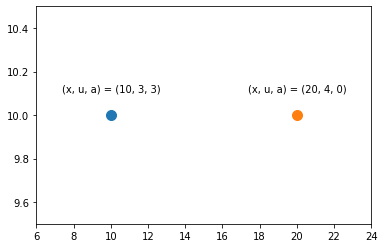

In [15]:
fig, axs = plt.subplots(1, 1)

x1 = 10
x2 = 20
u1 = 3
u2 = 4
a1 = 3
a2 = 0
y = 10
buff = 4
ax = axs
ax.scatter(x1, y, s=100)
ax.scatter(x2, y, s=100)
ax.annotate(f"(x, u, a) = {x1, u1, a1}", (x1, y), (x1, y+0.1), va="bottom", ha="center")
ax.annotate(f"(x, u, a) = {x2, u2, a2}", (x2, y), (x2, y+0.1), va="bottom", ha="center")
ax.set(xlim=(x1-buff, x2+buff), ylim=(y-0.5, y+0.5))

## Equations

Object $i$ is described by a tuple:
\begin{align}
\boldsymbol{V}_i &= (\text{position}, \text{speed}, \text{acceleration})
\end{align}

We write this as a function of time as:
$$
\boldsymbol{V}_i(t) = (x_i(t), u_i(t), a_i(t))
$$

Given constant initial conditions, and constant accelerations, we can write the components for any object as:
\begin{align}
x_i(t) &= x_i(0) + u_i(0)t + \frac{1}{2}a_i(0)t^2\\
u_i(t) &= u_i(0) + a_i(0)t\\
a_i(t) &= a_i(0)
\end{align}

For two objects, such as a vehicle behind an obstacle, we can write down their \emph{relative} position, speed and acceleration also as a function of time $t$.

\begin{align}
\Delta x(t) &= \Delta x(0) + \Delta u(0)t + \frac{1}{2}\Delta a(0)t^2\\
\Delta u(t) &= \Delta u(0) + \Delta a(0)t\\
\Delta a(t) &= \Delta a(0)

\end{align}

For convenience, when explicitly considering two objects, we drop the $\Delta$s, so that we have:
\begin{align}
x(t) &= x(0) + u(0)t + \frac{1}{2}a(0)t^2\\
u(t) &= u(0) + a(0)t\\
a(t) &= a(0)
\end{align}


## Deriving the time of a reaction to obstacle

With the relative equations set-up, we now derive the time at which a reaction is required from vehicle $i$ to obstacle $j$ (could be vehicle, pedestrian, etc).

We split the total time $t$ into two parts:
1. $0 \le t < t'$: vehicle $V$ continues without changing it's acceleration
2. $t' \le t < t_B$: vehicle $V$ switches to relative deceleration of $a(t) = a_B$ with respect to obstacle

We wish to calculate the time $t'$ at which the $V$ reacts and begins to brake.

Two conditions are necessary to determine $t'$, namely:
1. The relative position of the vehicle is $B$ behind the obstacle
2. The relative speed is 0.

We can express this using our formulation as:
\begin{equation}
\begin{align}
x(t_B) &= -B\\
u(t_B) &= 0\\
\end{align}
\end{equation}

And with the time period split in two with seperate accelerations:
\begin{equation}
x(t_B)  = \underbrace{\left(x(0) + u(0)t' + \frac{1}{2}a(0)t'^2\right)}_{\text{Rel position after time } t'} + \underbrace{\left(u(0) + a(0)t'\right) }_{\text{Rel speed after time }t'}(t_B - t') + \frac{1}{2}a_B(t_B - t')^2
\end{equation}
with $t_B - t'$ the total time spent decelerating. We can also write down the relative speed at $t_B$:
\begin{equation}
u(t_B) = (u(0) + a(0)t') + a_B (t_B - t')
\end{equation}

We can now apply our conditions, setting $u(t_B) = 0$, we find:
\begin{equation}
(t_B - t') = -\frac{u(0) + a(0)t'}{a_B}
\end{equation}
allowing us to substitute into our equation for $x(t_B)$ and eliminate $t_B$, finding:
\begin{align}
x(t_B) &= (x(0) + u(0)t'+\frac{1}{2}a(0)t'^2) - \frac{(u(0) + a(0)t')^2}{2a_B}\\
&= \frac{a(0)}{2}\left(1 - \frac{a(0)}{a_B}\right) t'^2 + u(0)\left(1-\frac{a(0)}{a_B}\right) t' + \left(x(0) - \frac{u(0)^2}{2a_B}\right) \\
&= -B
\end{align}

For convenience, we drop the $(0)$, such that $x:=x(0)$, $u:=u(0)$ and $a:=a(0)$, define:
$$
\gamma = \left(1 - \frac{a}{a_B}\right)
$$
and write this quadratic in $t'$ as:
\begin{align}
\frac{a}{2}\gamma t'^2 + u\gamma t' + \left(x - \frac{u^2}{2a_B} + B \right) = 0\\
\end{align}

We can now solve to $t'$ under different scenarios.

#### Case 1: obstacle and vehicle not accelerating, $a=0,\, a_B < 0$
In this case, we note that the equation for $x(t_B)$ is no longer quadratic in $t'$ with $\gamma=1$ and has the solution:
\begin{equation}
t' = \frac{1}{u}\left(\left(-B + \frac{u^2}{2a_B}\right) - x\right)
\end{equation}
which can be understood as the time for the distance travelled up to the braking point.

#### Case 2: obstacle not accelerating, vehicle accelerating, $a\ne0,\, a_B < 0$
When $a\ne0$, we need to solve the quadratic in $t'$ finding solutions:
\begin{equation}
t' = \frac{-u\gamma + \sqrt{(u\gamma)^2 - 2a\gamma\left(x - \frac{u^2}{2a_B} + B\right)}}{a\gamma}
\end{equation}
with only the positive root relevent given
$$
x - \frac{u^2}{2a_B} + B < 0
$$

#### Case 3: obstacle decelerating, $a_B = 0$
We can no longer apply the same formulation splitting the reaction into before and after $t'$ as after $t'$ the vehicle $V$ has a relative deceleration of $a_B=0$.
We therefore consider the time that the obstacle stops which is:
$$
t'' = \frac{-u_{obs}}{a_{obs}}
$$
We can now set $t' = t''$ and calculate $x(t_B)$ under this circumstance:
\begin{equation}
x(t_B) = (x + ut''+\frac{1}{2}at''^2) - \frac{(u + at'')^2}{2a_B}
\end{equation}
As long as $x(t_B) < -B$, then no action is required at $t=0$, and instead we add `ObstacleStop(t'')` to the event queue, so that vehicle can decelerate at $t=t''$ if still necesary. This works because we measured that it will be possible to brake and be behind the danger zone at this future time.

If instead, $x(t_B) \ge -B$, we pass an immediate `HazardEvent::Brake(Vehicle)` for the vehicle so it switches to decelerating.

#### Case 4: vehicle decelerating and obstacle decelerating, $a=0, \, a_B = 0$
The last condition of `case 3` leads to a case where both obstacle and vehicle are decelerating. Under this condition, we need to evaluate:
\begin{align}
t_{veh} &= \frac{-u_{veh}}{a_{veh}}\\
t_{obs} &= \frac{-u_{obs}}{a_{obs}}\\
\end{align}
which are the stopping times of the respective objects.

If $t_{veh} < t_{obs}$ or $t_{veh} > t_{obs}$ with $x<-B$, there is no collision.

If $$t_{veh} > t_{obs}$$ with $x(t_B)\ge-B$, there is a collision.

An emergency stop event is required at time $t=0$ in this case.
